In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
train.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,...,0,12,2,11,7,6,7,4,1,0
1,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,...,2,7,2,3,2,1,1,2,1,0
2,55,Travel_Rarely,Sales,2,1,Medical,842,3,Male,3,...,0,12,3,9,7,7,3,5,1,1
3,39,Travel_Rarely,Research & Development,24,1,Life Sciences,2014,1,Male,3,...,0,18,2,7,7,1,7,4,1,0
4,37,Travel_Rarely,Research & Development,3,3,Other,689,3,Male,3,...,1,10,2,10,7,7,8,1,1,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1628 entries, 0 to 1627
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1628 non-null   int64 
 1   BusinessTravel           1628 non-null   object
 2   Department               1628 non-null   object
 3   DistanceFromHome         1628 non-null   int64 
 4   Education                1628 non-null   int64 
 5   EducationField           1628 non-null   object
 6   EmployeeNumber           1628 non-null   int64 
 7   EnvironmentSatisfaction  1628 non-null   int64 
 8   Gender                   1628 non-null   object
 9   JobInvolvement           1628 non-null   int64 
 10  JobRole                  1628 non-null   object
 11  JobSatisfaction          1628 non-null   int64 
 12  MaritalStatus            1628 non-null   object
 13  MonthlyIncome            1628 non-null   int64 
 14  NumCompaniesWorked       1628 non-null  

In [12]:
train.describe()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
count,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,...,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.000000,1628.0,1628.000000
mean,35.645577,9.735258,2.884521,1000.985872,2.646192,2.650491,2.639435,5785.524570,2.761671,15.207617,...,0.692260,9.949017,2.752457,6.092752,3.614865,2.049140,3.551597,3.135749,1.0,0.482187
std,9.481794,8.306546,1.020470,585.417694,1.125283,0.736330,1.096272,4339.293147,2.549995,3.686703,...,0.864808,7.482936,1.288033,5.921168,3.481051,3.138287,3.494369,1.408770,0.0,0.499836
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,29.000000,2.000000,2.000000,509.250000,2.000000,2.000000,2.000000,2625.000000,1.000000,12.000000,...,0.000000,5.000000,2.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.0,0.000000
50%,34.000000,8.000000,3.000000,977.000000,3.000000,3.000000,3.000000,4304.000000,2.000000,14.000000,...,0.000000,8.000000,3.000000,5.000000,2.000000,1.000000,2.000000,3.000000,1.0,0.000000
75%,42.000000,15.000000,4.000000,1494.000000,4.000000,3.000000,4.000000,7124.250000,4.000000,18.000000,...,1.000000,13.000000,3.000000,8.000000,7.000000,2.000000,7.000000,4.000000,1.0,1.000000
max,60.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,4.000000,19999.000000,9.000000,25.000000,...,3.000000,38.000000,6.000000,37.000000,18.000000,15.000000,17.000000,5.000000,1.0,1.000000


In [13]:
train.dtypes

Age                         int64
BusinessTravel             object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                     object
JobInvolvement              int64
JobRole                    object
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
PercentSalaryHike           int64
PerformanceRating           int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
CommunicationSkill          int64
Behaviour                   int64
Attrition                   int64
dtype: object

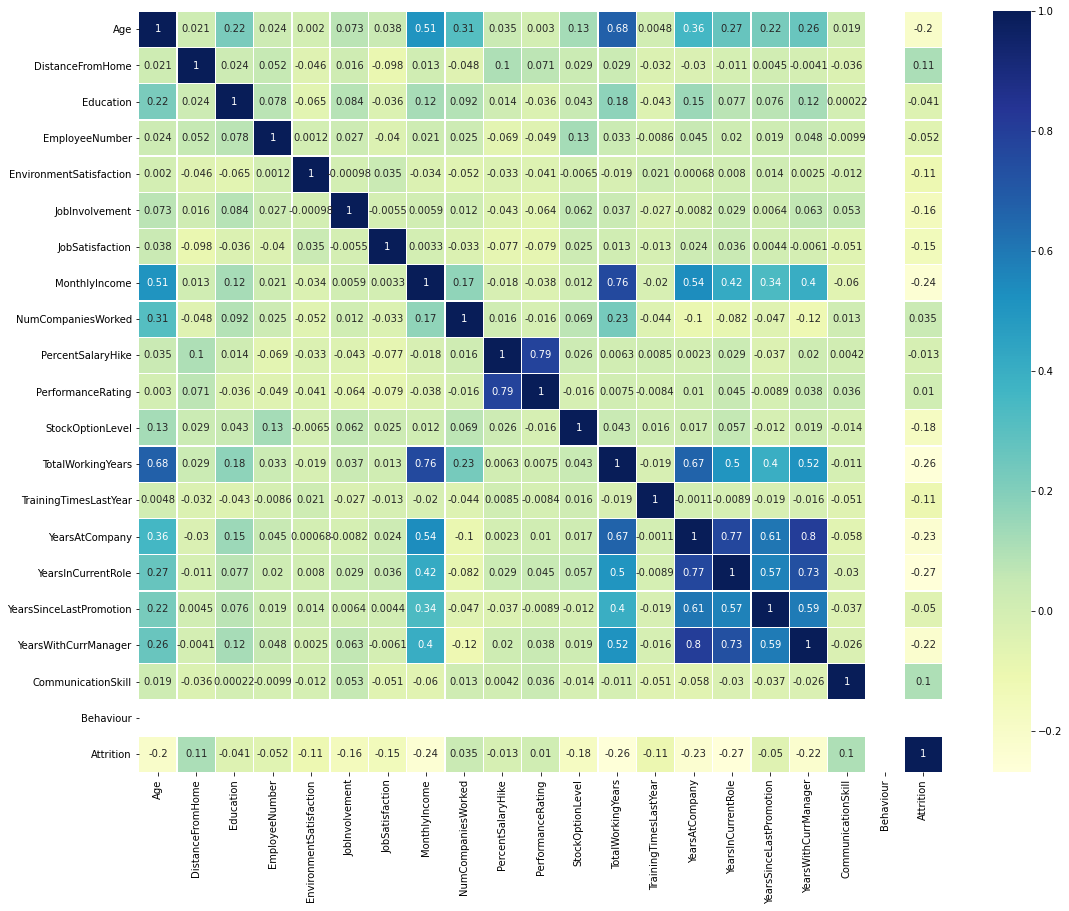

In [14]:
plt.figure(figsize=(18,14))
sns.heatmap(train.corr(),annot=True,linewidth=0.3,cmap='YlGnBu')
plt.show()

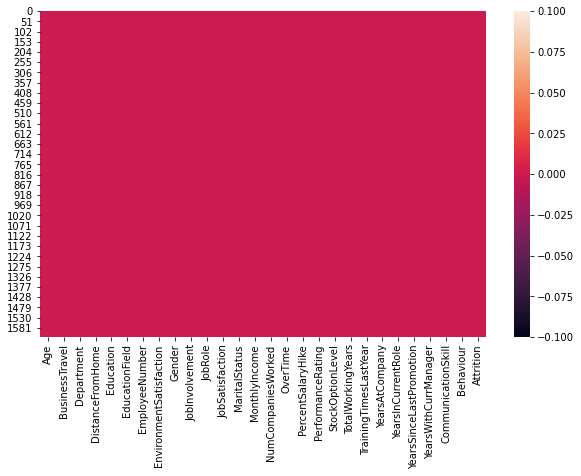

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(train.isnull())
plt.show()

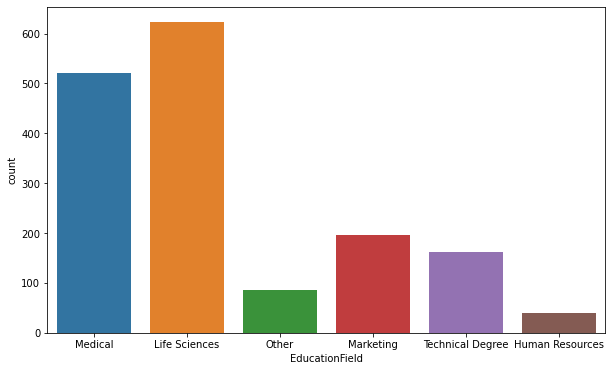

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(train['EducationField'])
plt.show()

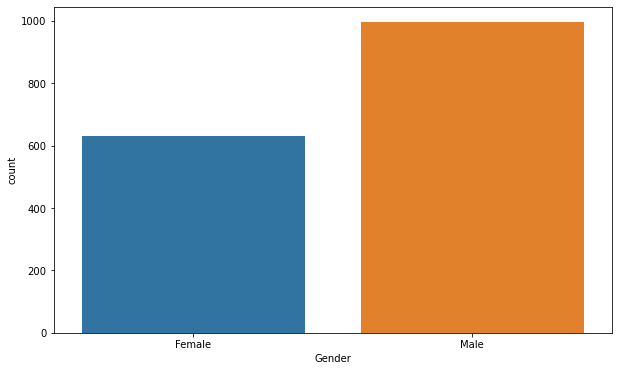

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(train['Gender'])
plt.show()

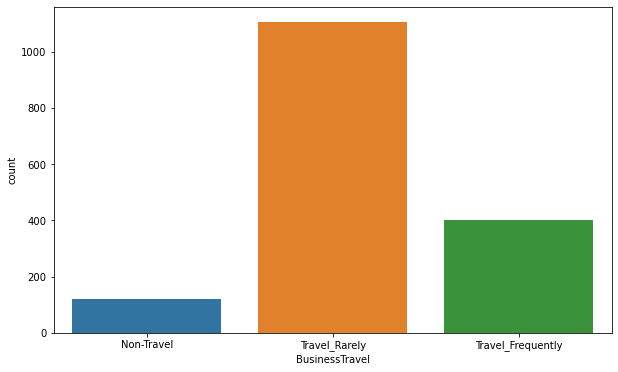

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(train['BusinessTravel'])
plt.show()

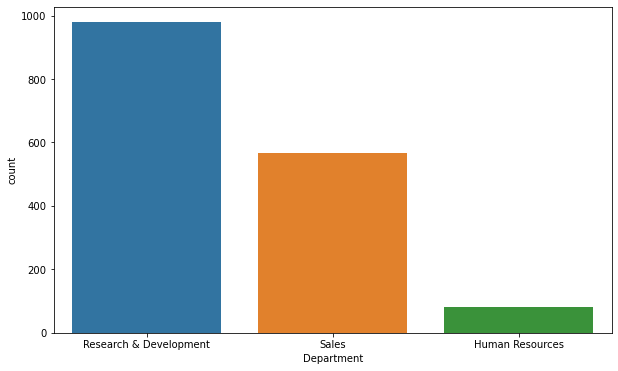

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(train['Department'])
plt.show()

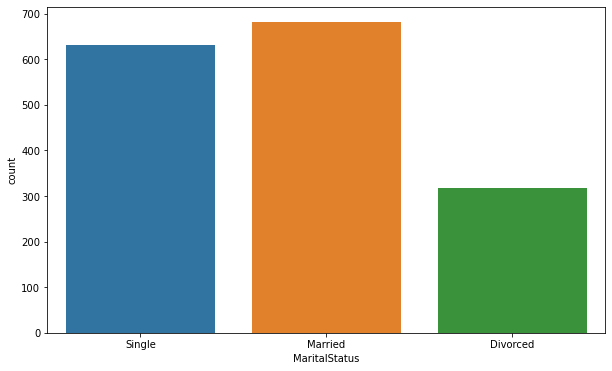

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(train['MaritalStatus'])
plt.show()

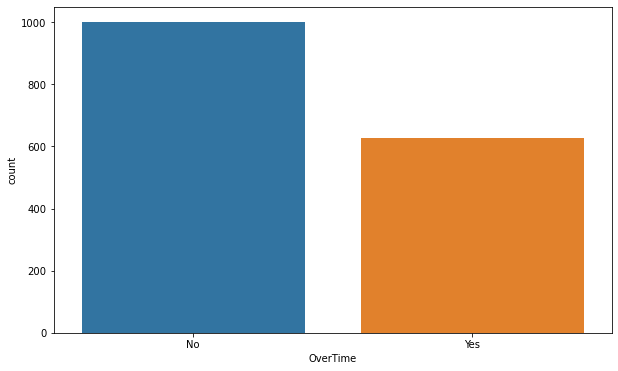

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(train['OverTime'])
plt.show()

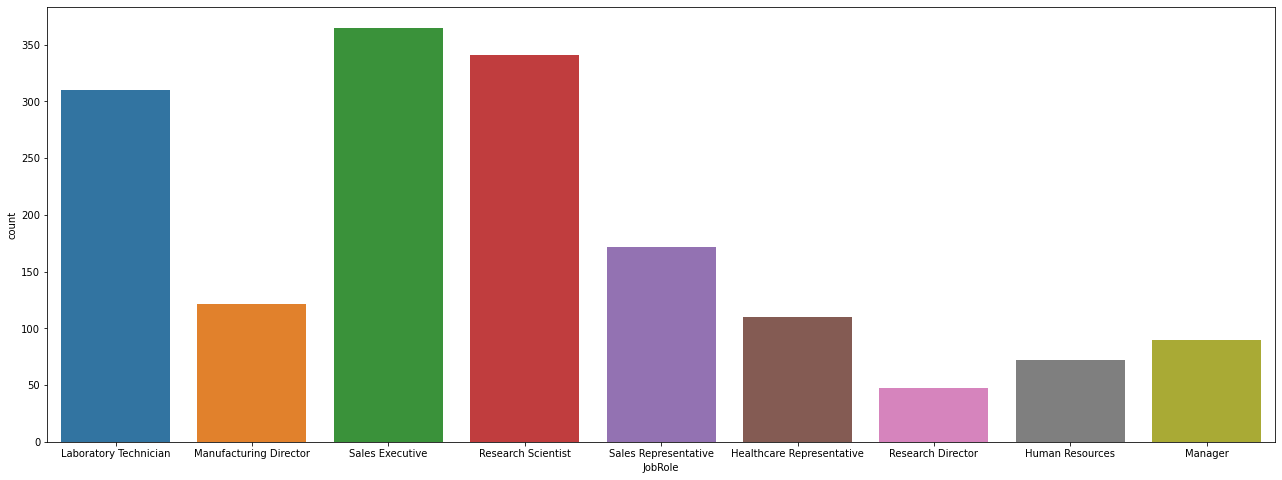

In [22]:
plt.figure(figsize=(22,8))
sns.countplot(train['JobRole'])
plt.show()

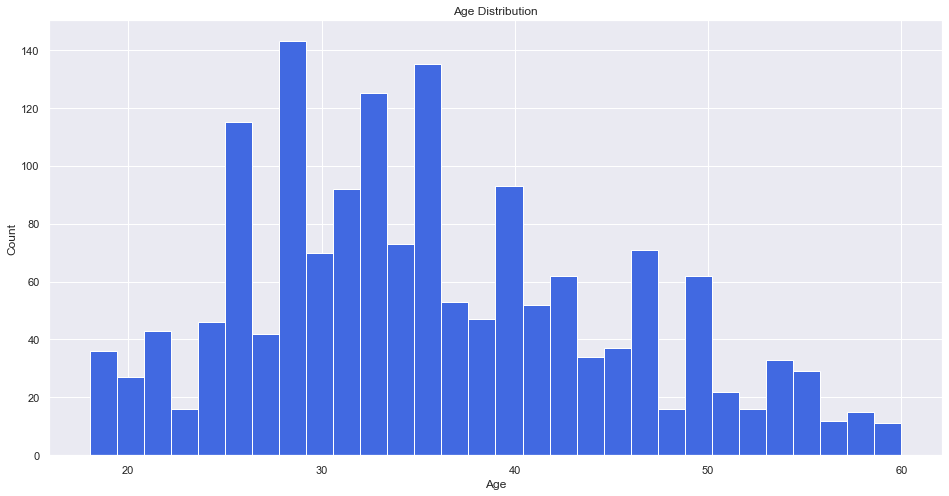

In [23]:
sns.set(rc={'figure.figsize':(16,8)})
plt.hist(train['Age'],bins=30,color='royalblue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.show()

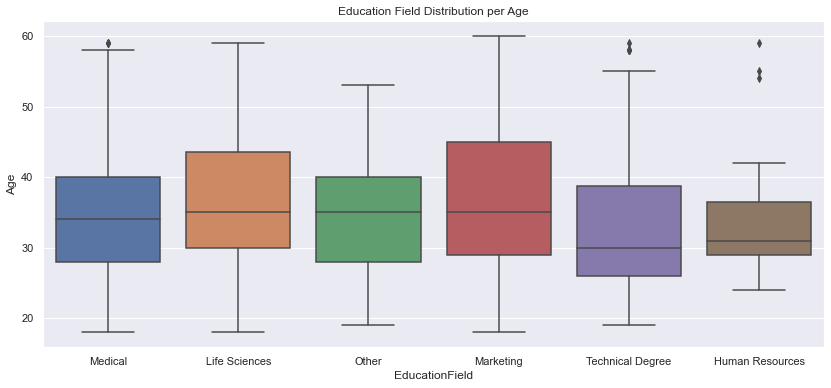

In [24]:
sns.set(rc={"figure.figsize":(14,6)})
sns.boxplot(x='EducationField',y='Age',data=train)
plt.title('Education Field Distribution per Age')
plt.show()

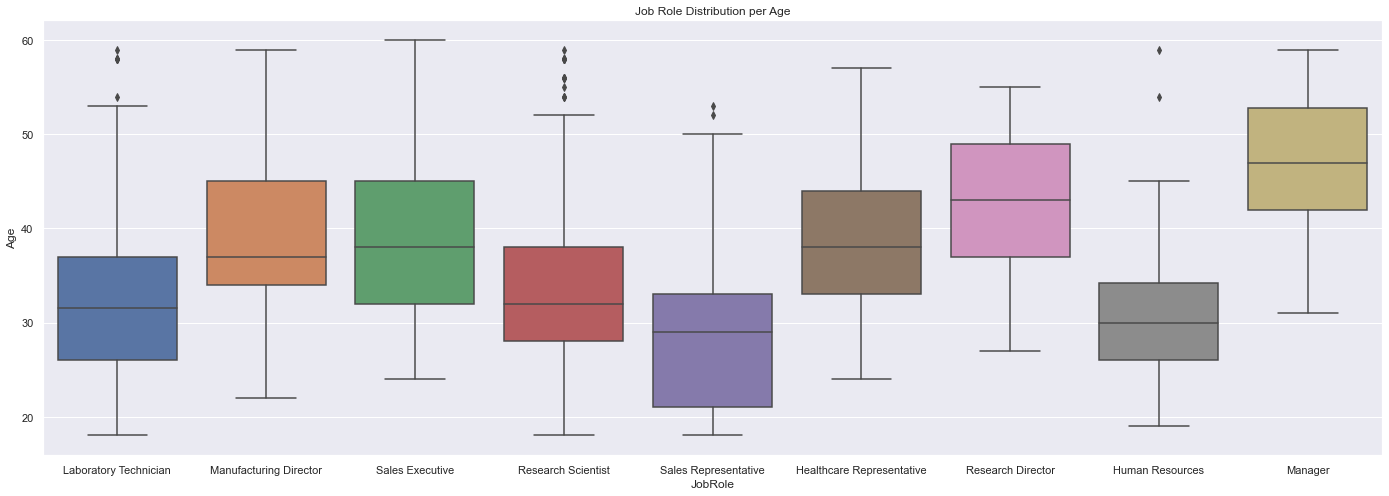

In [25]:
sns.set(rc={"figure.figsize":(24,8)})
sns.boxplot(x='JobRole',y='Age',data=train)
plt.title('Job Role Distribution per Age')
plt.show()

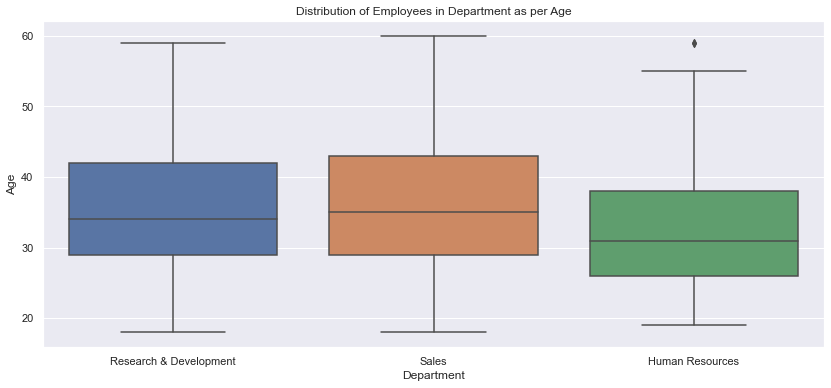

In [26]:
sns.set(rc={"figure.figsize":(14,6)})
sns.boxplot(x='Department',y='Age',data=train)
plt.title('Distribution of Employees in Department as per Age')
plt.show()

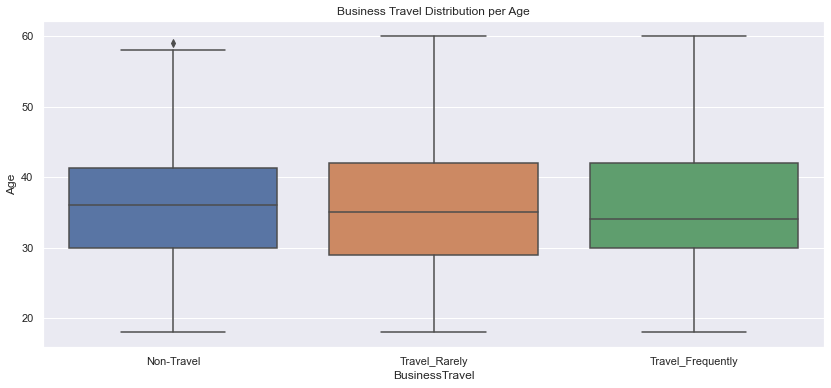

In [27]:
sns.set(rc={"figure.figsize":(14,6)})
sns.boxplot(x='BusinessTravel',y='Age',data=train)
plt.title('Business Travel Distribution per Age')
plt.show()

In [28]:
train.head(2)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,...,0,12,2,11,7,6,7,4,1,0
1,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,...,2,7,2,3,2,1,1,2,1,0


In [29]:
testdata = test.drop(columns=['Id','EmployeeNumber'],axis=1)

In [30]:
train.drop(columns=['EmployeeNumber'],inplace=True)

In [31]:
attrition = train[train['Attrition']==1]
not_attrition = train[train['Attrition']==0]

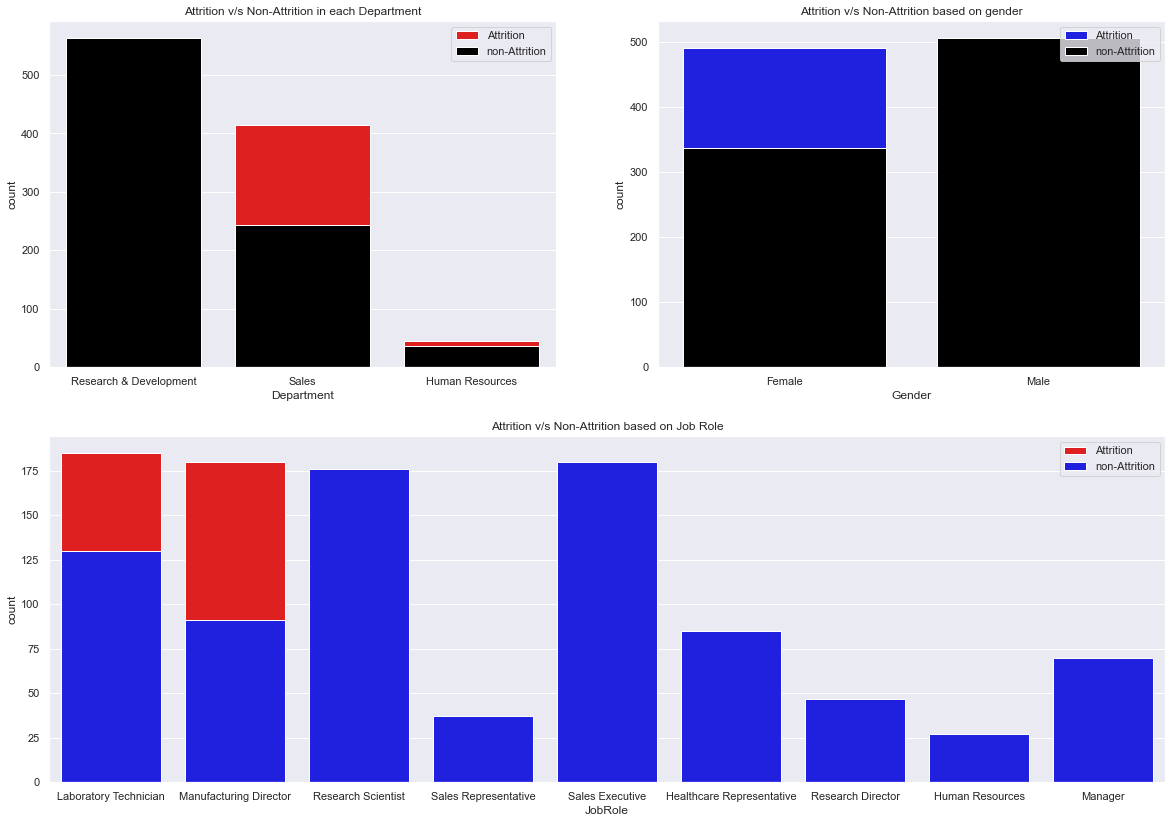

In [32]:
fig = plt.figure(figsize=(20, 14))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = sns.countplot(attrition['Department'],color='red',alpha=1,label="Attrition")
ax1 = sns.countplot(not_attrition['Department'],color='black',alpha=1,label="non-Attrition")
ax1 = plt.title("Attrition v/s Non-Attrition in each Department")
ax1 = plt.legend(loc='best')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = sns.countplot(attrition['Gender'],color='blue',alpha=1,label="Attrition")
ax2 = sns.countplot(not_attrition['Gender'],color='black',alpha=1,label="non-Attrition")
ax2 = plt.title("Attrition v/s Non-Attrition based on gender")
ax2 = plt.legend(loc='best')

ax3 = plt.subplot2grid((2, 2), (1, 0),colspan=2)
ax3 = sns.countplot(attrition['JobRole'],color='red',alpha=1,label="Attrition")
ax3 = sns.countplot(not_attrition['JobRole'],color='blue',alpha=1,label="non-Attrition")
ax3 = plt.title("Attrition v/s Non-Attrition based on Job Role")
ax3 = plt.legend(loc='best')

In [33]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

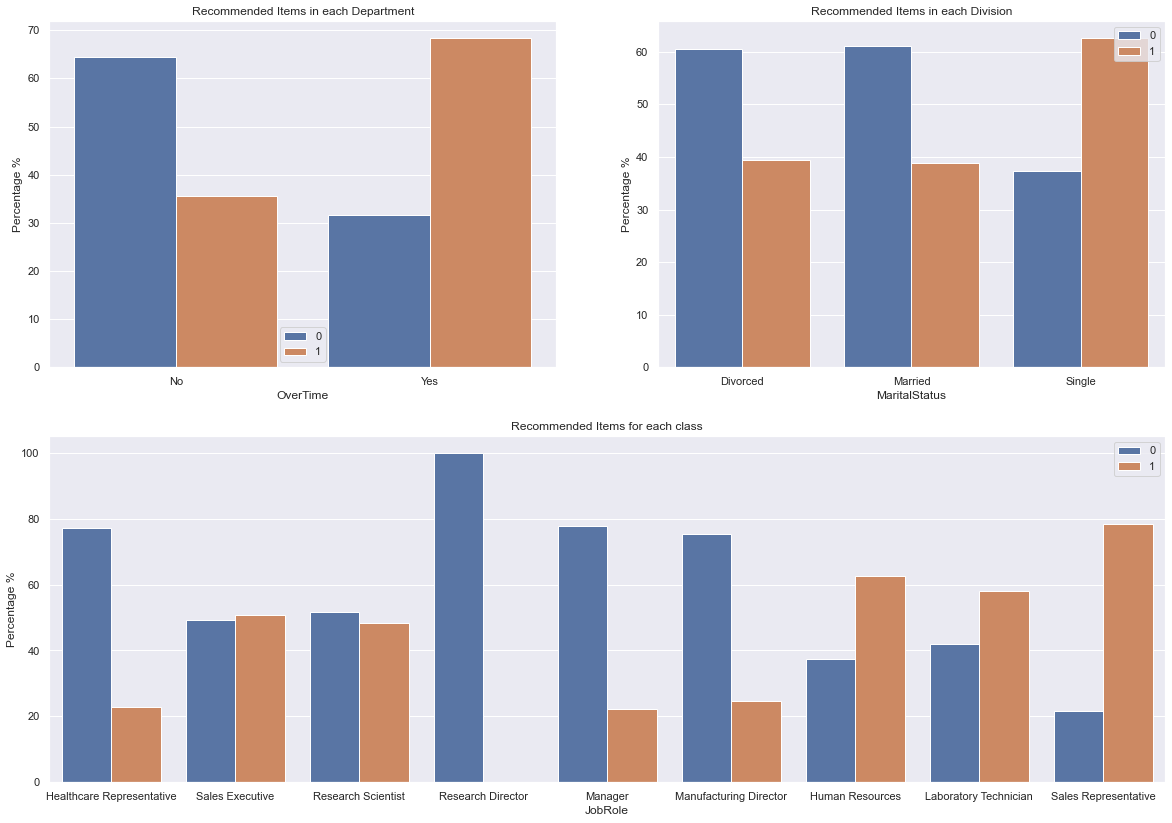

In [34]:
hue = "Attrition"
fig = plt.figure(figsize=(20, 14))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = percentstandardize_barplot(x="OverTime",y="Percentage",hue=hue,data=train)
ax1 = plt.title("Recommended Items in each Department")
ax1 = plt.legend(loc='best')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = percentstandardize_barplot(x="MaritalStatus",y="Percentage", hue=hue,data=train)
ax2 = plt.title("Recommended Items in each Division")
ax2 = plt.legend(loc='best')

ax3 = plt.subplot2grid((2, 2), (1, 0),colspan=2)
ax3 = percentstandardize_barplot(x="JobRole",y="Percentage", hue=hue,data=train)
ax3 = plt.title("Recommended Items for each class")
ax3 = plt.legend(loc='best')
plt.show()

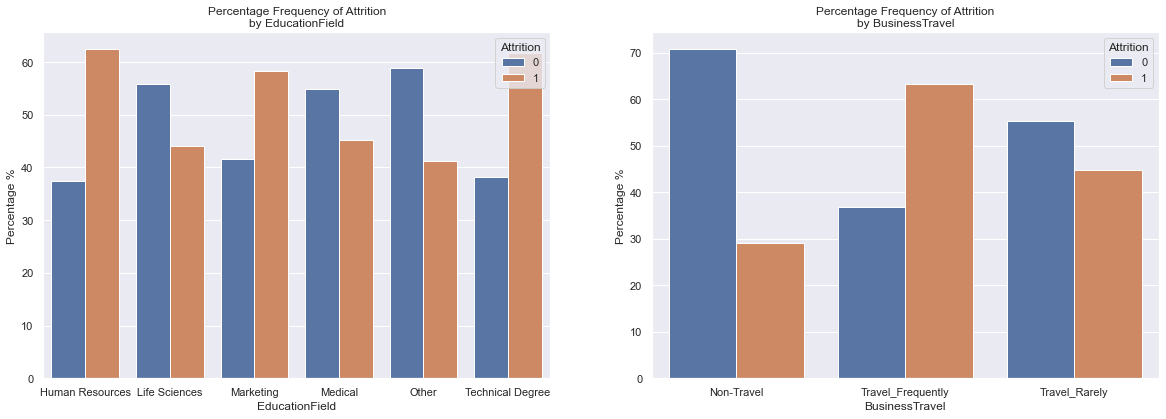

In [35]:
xvar = ["EducationField","BusinessTravel"]
hue = "Attrition"
fig = plt.figure(figsize=(20, 14))

ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = percentstandardize_barplot(x=xvar[0],y="Percentage", hue=hue,data=train)
ax1 = plt.title("Percentage Frequency of {}\nby {}".format(hue, xvar[0]))
ax1 = plt.ylabel("Percentage %")

ax2 = plt.subplot2grid((2, 2), (0,1))
ax2 = percentstandardize_barplot(x=xvar[1],y="Percentage", hue=hue,data=train)
ax2 = plt.title("Percentage Frequency of {}\nby {}".format(hue, xvar[1]))
ax2 = plt.ylabel("Percentage %")
plt.show()

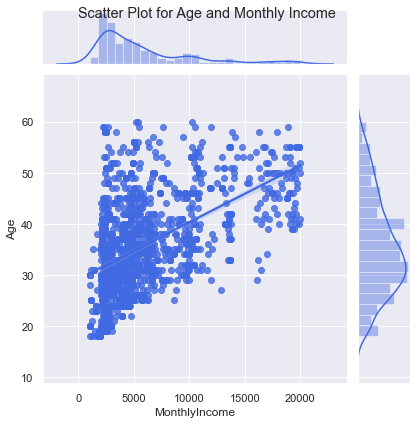

In [36]:
g = sns.jointplot(x= train["MonthlyIncome"], y=train["Age"], kind='reg', color='royalblue')
g.fig.suptitle("Scatter Plot for Age and Monthly Income")
plt.show()

In [37]:
categorical = train.dtypes==object
categorical_cols = train.columns[categorical].tolist()
print(categorical_cols)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [38]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
testdata[categorical_cols] = testdata[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))


In [39]:
train.head(3)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,30,0,1,2,3,3,3,0,3,2,...,0,12,2,11,7,6,7,4,1,0
1,36,2,1,12,4,1,3,0,3,4,...,2,7,2,3,2,1,1,2,1,0
2,55,2,2,2,1,3,3,1,3,7,...,0,12,3,9,7,7,3,5,1,1


In [40]:
X = train.drop(columns=['Attrition'],axis=1)
y = train['Attrition']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
pd.set_option('display.max_columns', 500)
X.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour
0,30,0,1,2,3,3,3,0,3,2,4,2,2564,0,0,14,3,0,12,2,11,7,6,7,4,1
1,36,2,1,12,4,1,3,0,3,4,3,1,4663,9,1,12,3,2,7,2,3,2,1,1,2,1
2,55,2,2,2,1,3,3,1,3,7,4,2,5160,4,0,16,3,0,12,3,9,7,7,3,5,1
3,39,2,1,24,1,1,1,1,3,6,4,2,4108,7,0,13,3,0,18,2,7,7,1,7,4,1
4,37,2,1,3,3,4,3,1,3,4,3,1,9434,1,0,15,3,1,10,2,10,7,7,8,1,1


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.fit_transform(X_test)
# X_scl = scaler.fit_transform(X)
testdata_scl = scaler.fit_transform(testdata)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
lr = LogisticRegression()
lr.fit(X_train_scl ,y_train)
pred = lr.predict(X_test_scl)
print("confusion matrix: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score: ",accuracy_score(pred,y_test))
print("\n")
print("classification report: \n",classification_report(pred,y_test))

confusion matrix: 
 [[128  37]
 [ 44 117]]


accuracy score:  0.7515337423312883


classification report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       165
           1       0.76      0.73      0.74       161

    accuracy                           0.75       326
   macro avg       0.75      0.75      0.75       326
weighted avg       0.75      0.75      0.75       326



In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2500 , n_jobs=-1)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print("confusion matrix: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score: ",accuracy_score(pred,y_test))
print("\n")
print("classification report: \n",classification_report(pred,y_test))

confusion matrix: 
 [[163   0]
 [  9 154]]


accuracy score:  0.9723926380368099


classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       163
           1       1.00      0.94      0.97       163

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326



In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2500 , n_jobs=-1)
rf.fit(X_train,y_train)
pred = rf.predict_proba(X_test)

In [47]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train_scl,y_train)
pred = svc.predict(X_test_scl)
print("confusion matrix: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score: ",accuracy_score(pred,y_test))
print("\n")
print("classification report: \n",classification_report(pred,y_test))

confusion matrix: 
 [[141   9]
 [ 31 145]]


accuracy score:  0.8773006134969326


classification report: 
               precision    recall  f1-score   support

           0       0.82      0.94      0.88       150
           1       0.94      0.82      0.88       176

    accuracy                           0.88       326
   macro avg       0.88      0.88      0.88       326
weighted avg       0.89      0.88      0.88       326



In [48]:
import xgboost
xgb=xgboost.XGBClassifier()
xgb.fit(X_train ,y_train)
pred = xgb.predict(X_test)
print("confusion matrix: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score: ",accuracy_score(pred,y_test))
print("\n")
print("classification report: \n",classification_report(pred,y_test))

confusion matrix: 
 [[156   0]
 [ 16 154]]


accuracy score:  0.950920245398773


classification report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       156
           1       1.00      0.91      0.95       170

    accuracy                           0.95       326
   macro avg       0.95      0.95      0.95       326
weighted avg       0.96      0.95      0.95       326



# FEATURE SELECTION

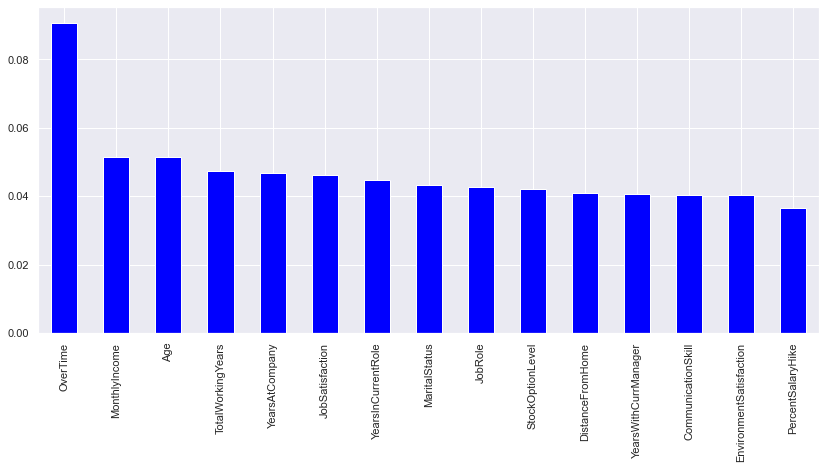

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.ensemble import ExtraTreesClassifier
extra = ExtraTreesClassifier()
extra.fit(X,y)
feat_importances = pd.Series(extra.feature_importances_, index=X.columns)
# displaying the top 10 features
feat_importances.nlargest(15).plot(kind='bar' , color='blue')
plt.show()

In [50]:
imp = pd.DataFrame(feat_importances.nlargest(15)).reset_index()
extratreefeatures = imp['index'].tolist()
extratreefeatures

['OverTime',
 'MonthlyIncome',
 'Age',
 'TotalWorkingYears',
 'YearsAtCompany',
 'JobSatisfaction',
 'YearsInCurrentRole',
 'MaritalStatus',
 'JobRole',
 'StockOptionLevel',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'CommunicationSkill',
 'EnvironmentSatisfaction',
 'PercentSalaryHike']

In [51]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
featureScores

,Feature,Score
0,Age,1.651230e+02
1,BusinessTravel,3.427543e-01
2,Department,3.864548e+00
3,DistanceFromHome,1.375667e+02
4,Education,1.006257e+00
5,EducationField,2.841604e+00
6,EnvironmentSatisfaction,9.721901e+00
7,Gender,3.816364e-01
8,JobInvolvement,8.489289e+00
9,JobRole,3.465457e+01


In [52]:
print("TOP 15 FEATURES Based on ChiSquare Test")
print(featureScores.nlargest(15,'Score'))

TOP 15 FEATURES Based on ChiSquare Test
                    Feature          Score
12            MonthlyIncome  306222.899607
18        TotalWorkingYears     633.002291
20           YearsAtCompany     495.535070
21       YearsInCurrentRole     395.855969
23     YearsWithCurrManager     277.553022
0                       Age     165.123023
3          DistanceFromHome     137.566749
14                 OverTime     103.165751
17         StockOptionLevel      54.136483
9                   JobRole      34.654573
11            MaritalStatus      29.257098
22  YearsSinceLastPromotion      19.847151
10          JobSatisfaction      16.229572
24       CommunicationSkill      11.004965
19    TrainingTimesLastYear      10.948764


# MAKING MODEL USING TOP 15 FEATURES by Extra Tree

In [53]:
extratreefeatures.append("Attrition")

In [54]:
extratreefeatures

['OverTime',
 'MonthlyIncome',
 'Age',
 'TotalWorkingYears',
 'YearsAtCompany',
 'JobSatisfaction',
 'YearsInCurrentRole',
 'MaritalStatus',
 'JobRole',
 'StockOptionLevel',
 'DistanceFromHome',
 'YearsWithCurrManager',
 'CommunicationSkill',
 'EnvironmentSatisfaction',
 'PercentSalaryHike',
 'Attrition']

In [55]:
df = pd.read_csv("train.csv")
df.head(2)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,CommunicationSkill,Behaviour,Attrition
0,30,Non-Travel,Research & Development,2,3,Medical,571,3,Female,3,Laboratory Technician,4,Single,2564,0,No,14,3,0,12,2,11,7,6,7,4,1,0
1,36,Travel_Rarely,Research & Development,12,4,Life Sciences,1614,3,Female,3,Manufacturing Director,3,Married,4663,9,Yes,12,3,2,7,2,3,2,1,1,2,1,0


In [56]:
train = df[extratreefeatures]
train.head()

,OverTime,MonthlyIncome,Age,TotalWorkingYears,YearsAtCompany,JobSatisfaction,YearsInCurrentRole,MaritalStatus,JobRole,StockOptionLevel,DistanceFromHome,YearsWithCurrManager,CommunicationSkill,EnvironmentSatisfaction,PercentSalaryHike,Attrition
0,No,2564,30,12,11,4,7,Single,Laboratory Technician,0,2,7,4,3,14,0
1,Yes,4663,36,7,3,3,2,Married,Manufacturing Director,2,12,1,2,3,12,0
2,No,5160,55,12,9,4,7,Single,Sales Executive,0,2,3,5,3,16,1
3,No,4108,39,18,7,4,7,Single,Research Scientist,0,24,7,4,1,13,0
4,No,9434,37,10,10,3,7,Married,Manufacturing Director,1,3,8,1,3,15,0


In [57]:
df['StockOptionLevel'].value_counts()

0    836
1    557
2    135
3    100
Name: StockOptionLevel, dtype: int64

In [59]:
df['CommunicationSkill'].value_counts()

5    375
4    342
2    325
3    313
1    273
Name: CommunicationSkill, dtype: int64

In [60]:
df['EnvironmentSatisfaction'].value_counts()

3    480
4    472
1    372
2    304
Name: EnvironmentSatisfaction, dtype: int64

In [62]:
df['JobSatisfaction'].value_counts()

3    529
4    434
1    356
2    309
Name: JobSatisfaction, dtype: int64

In [84]:
categorical = train.dtypes==object
categorical_cols = train.columns[categorical].tolist()
print(categorical_cols)

['OverTime', 'MaritalStatus', 'JobRole']


In [87]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder() 
mapping_dict = {}
for col in categorical_cols:
    train[col]=labelEncoder.fit_transform(train[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'OverTime': {'No': 0, 'Yes': 1}, 'MaritalStatus': {'Divorced': 0, 'Married': 1, 'Single': 2}, 'JobRole': {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}}


c:\users\karti\miniconda3\envs\kartik\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [89]:
train.head()

,OverTime,TotalWorkingYears,MonthlyIncome,Age,YearsAtCompany,StockOptionLevel,YearsInCurrentRole,JobSatisfaction,MaritalStatus,JobRole,CommunicationSkill,DistanceFromHome,EnvironmentSatisfaction,YearsWithCurrManager,TrainingTimesLastYear,Attrition
0,0,12,2564,30,11,0,7,4,2,2,4,2,3,7,2,0
1,1,7,4663,36,3,2,2,3,1,4,2,12,3,1,2,0
2,0,12,5160,55,9,0,7,4,2,7,5,2,3,3,3,1
3,0,18,4108,39,7,0,7,4,2,6,4,24,1,7,2,0
4,0,10,9434,37,10,1,7,3,1,4,1,3,3,8,2,0


In [90]:
X = train.drop(columns=['Attrition'],axis=1)
y = train['Attrition']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [93]:
train.columns

Index(['OverTime', 'TotalWorkingYears', 'MonthlyIncome', 'Age',
       'YearsAtCompany', 'StockOptionLevel', 'YearsInCurrentRole',
       'JobSatisfaction', 'MaritalStatus', 'JobRole', 'CommunicationSkill',
       'DistanceFromHome', 'EnvironmentSatisfaction', 'YearsWithCurrManager',
       'TrainingTimesLastYear', 'Attrition'],
      dtype='object')

In [91]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2500 , n_jobs=-1)
rf.fit(X_train,y_train)
pred = rf.predict(X_test)
print("confusion matrix: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score: ",accuracy_score(pred,y_test))
print("\n")
print("classification report: \n",classification_report(pred,y_test))

confusion matrix: 
 [[163   0]
 [  9 154]]


accuracy score:  0.9723926380368099


classification report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       163
           1       1.00      0.94      0.97       163

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326



In [92]:
import xgboost
xgb=xgboost.XGBClassifier()
xgb.fit(X_train ,y_train)
pred = xgb.predict(X_test)
print("confusion matrix: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score: ",accuracy_score(pred,y_test))
print("\n")
print("classification report: \n",classification_report(pred,y_test))

confusion matrix: 
 [[156   0]
 [ 16 154]]


accuracy score:  0.950920245398773


classification report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95       156
           1       1.00      0.91      0.95       170

    accuracy                           0.95       326
   macro avg       0.95      0.95      0.95       326
weighted avg       0.96      0.95      0.95       326



In [94]:
# RANDOMSEARCHCV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [95]:
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  9.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [96]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [97]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='sqrt', n_estimators=400)

In [98]:
print("RandomSearchCV training accuracy;", rf_random.best_score_)

RandomSearchCV training accuracy; 0.9700707338638374


In [99]:
pred = rf_random.predict(X_test)
print("randomforest confusion matrix with randomsearchCV: \n",confusion_matrix(pred,y_test))
print("\n")
print("randomforest test accuracy score with randomsearchCV: ",accuracy_score(pred,y_test))
print("\n")
print("randomforest classification report with randomsearchCV: \n",classification_report(pred,y_test))

randomforest confusion matrix with randomsearchCV: 
 [[165   0]
 [  7 154]]


randomforest test accuracy score with randomsearchCV:  0.9785276073619632


randomforest classification report with randomsearchCV: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       165
           1       1.00      0.96      0.98       161

    accuracy                           0.98       326
   macro avg       0.98      0.98      0.98       326
weighted avg       0.98      0.98      0.98       326



In [101]:
import pickle
file = open('RFregression_model.pkl', 'wb')
pickle.dump(rf_random, file)

# VOTING CLASSIFIER

In [102]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [103]:
rf = RandomForestClassifier(n_estimators=400 , n_jobs=-1)
dt = DecisionTreeClassifier()
xgb=xgboost.XGBClassifier()

voting = VotingClassifier(estimators=[
         ('rf', rf), ('dt', dt), ('xgb', xgb)], voting='hard')
voting.fit(X_train, y_train)
pred = voting.predict(X_test)
print("confusion matrix for voting classifier: \n",confusion_matrix(pred,y_test))
print("\n")
print("accuracy score for voting classifier: ",accuracy_score(pred,y_test))
print("\n")
print("classification report for voting classifier: \n",classification_report(pred,y_test))

confusion matrix for voting classifier: 
 [[161   0]
 [ 11 154]]


accuracy score for voting classifier:  0.9662576687116564


classification report for voting classifier: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       161
           1       1.00      0.93      0.97       165

    accuracy                           0.97       326
   macro avg       0.97      0.97      0.97       326
weighted avg       0.97      0.97      0.97       326

